# Hiperparâmetros

In [1]:
! pip install prophet==1.1.5 plotly

In [10]:
import pandas as pd
import seaborn as sns
from prophet import Prophet

CSV_PATH_NO_OUTLIERS = './data/processed/df_br_no_outliers.csv'

df_br = pd.read_csv(CSV_PATH_NO_OUTLIERS, 
                    parse_dates=['ds'])

df_br.head()

,ds,y
0,1832-01-01,24.935
1,1832-02-01,24.505
2,1832-03-01,24.617
3,1832-04-01,23.990
4,1832-05-01,23.124


## Parâmetros ajustáveis

* **changepoint_prior_scale**: determina a flexibilidade da tendência e a mudança nos _changepoints_;
* **sazonality_prior_scale**: flexibilidade da sazionalidade. Valores altos permitem adaptação para altas flutuações, e por sua vez, valores baixos diminuem a magnitude da sazonalidade;
* **holiday_prior_scale**: controla a flexibilidade para ajustes em feriados;
* **sazonality_mode**: Pode ser `additive` ou `multiplicative` - default como sendo o primeiro tipo.

> pg. 97-98

## Parâmetros talvez ajustáveis

* **changepoint_range**: proporção da série temporal em que a tendência pode mudar;

> pg. 98

## Parâmetros que não seriam ajustados

* **growth**: Pode ser `linear` ou `logistic` - default sendo o primeiro tipo;
* **changepoints**: Especifica, manualmente, locais de changepoints;
* **n_changepoints**: Quantidade de changepoints colocados automaticamente;
* **yearly_seasonality**: `auto`, `True` ou `False` - padrão com o primeiro tipo;
* **weekly_seasonality**: `auto`, `True` ou `False` - padrão com o primeiro tipo;
* **daily_seasonality**: `auto`, `True` ou `False` - padrão com o primeiro tipo;
* **holidays**: Informa feriados por meio de um DataFrame;
* **interval_width**: Default como 80%. São os intervalos de incerteza para cada componente.

## Hiperparâmetros com `GridSearchCV`

In [13]:
from itertools import product

param_grid = dict(changepoint_prior_scale=[.001, .01, .1, .5],
                  seasonality_prior_scale=[.01, .1, 1.0, 10.0],
                  seasonality_mode=['additive', 'multiplicative'])

all_params = [dict(zip(param_grid.keys(), value)) for value in product(*param_grid.values())]

all_params[:5]

[{'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 0.01,
  'seasonality_mode': 'additive'},
 {'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 0.01,
  'seasonality_mode': 'multiplicative'},
 {'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 0.1,
  'seasonality_mode': 'additive'},
 {'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 0.1,
  'seasonality_mode': 'multiplicative'},
 {'changepoint_prior_scale': 0.001,
  'seasonality_prior_scale': 1.0,
  'seasonality_mode': 'additive'}]

In [15]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

mse_results = []

for params in all_params:
    model = Prophet(**params)
    
    model.fit(df_br)

    df_cv = cross_validation(model,
                             initial='7300 days',
                             period='1825 days',
                             horizon='3650 days',
                             parallel='processes')

    df_p = performance_metrics(df_cv, rolling_window=1)

    mse_results.append(df_p['mse'].values[0])

results = pd.DataFrame(all_params)
results['mse'] = mse_results
results

20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] done processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] done processing
20:53:46 - cmdstanpy - INFO - Chain [1] done processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] done processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain [1] done processing
20:53:46 - cmdstanpy - INFO - Chain [1] start processing
20:53:46 - cmdstanpy - INFO - Chain 

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,mse
0,0.001,0.01,additive,0.099095
1,0.001,0.01,multiplicative,0.098334
2,0.001,0.10,additive,0.099137
3,0.001,0.10,multiplicative,0.098701
4,0.001,1.00,additive,0.099461
5,0.001,1.00,multiplicative,0.099058
6,0.001,10.00,additive,0.098890
7,0.001,10.00,multiplicative,0.101071
8,0.010,0.01,additive,0.107218
9,0.010,0.01,multiplicative,0.106491


In [16]:
import numpy as np

best_params = all_params[np.argmin(mse_results)]
best_params

{'changepoint_prior_scale': 0.001,
 'seasonality_prior_scale': 0.01,
 'seasonality_mode': 'multiplicative'}

In [18]:
model = Prophet(**best_params)

model.fit(df_br)

df_future = model.make_future_dataframe(periods=300, freq='M')

predictions = model.predict(df_future)

predictions.head()

20:56:00 - cmdstanpy - INFO - Chain [1] start processing
20:56:00 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1832-01-01,24.060872,24.277115,25.064493,24.060872,24.060872,0.025028,0.025028,0.025028,0.025028,0.025028,0.025028,0.0,0.0,0.0,24.663064
1,1832-02-01,24.061384,24.201469,24.958854,24.061384,24.061384,0.021562,0.021562,0.021562,0.021562,0.021562,0.021562,0.0,0.0,0.0,24.580184
2,1832-03-01,24.061863,24.002456,24.788501,24.061863,24.061863,0.014785,0.014785,0.014785,0.014785,0.014785,0.014785,0.0,0.0,0.0,24.417621
3,1832-04-01,24.062375,23.519246,24.328685,24.062375,24.062375,-0.006818,-0.006818,-0.006818,-0.006818,-0.006818,-0.006818,0.0,0.0,0.0,23.898329
4,1832-05-01,24.062870,22.994575,23.791750,24.062870,24.062870,-0.028217,-0.028217,-0.028217,-0.028217,-0.028217,-0.028217,0.0,0.0,0.0,23.383886


/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(116.97222222222221, 0.5, 'Temperatura (°C)')

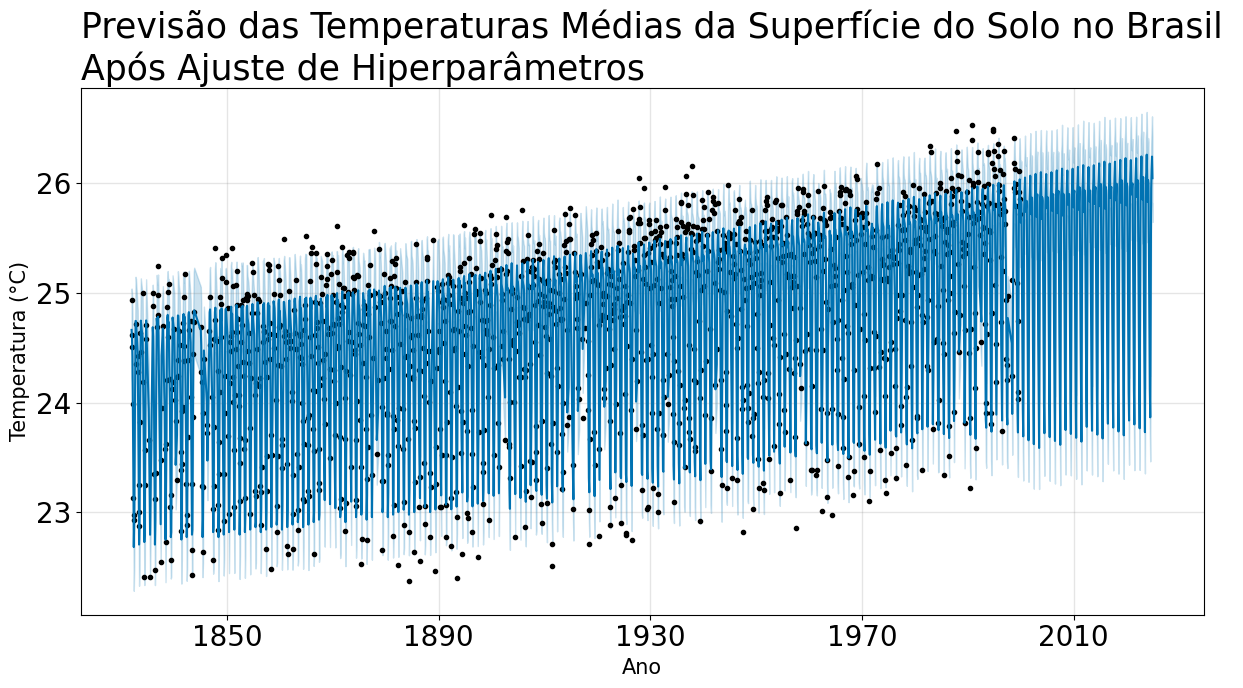

In [23]:
from matplotlib import pyplot as plt

fig = model.plot(predicitons, figsize=(12,6))

plt.title('Previsão das Temperaturas Médias '
          'da Superfície do Solo no Brasil \nApós '
          'Ajuste de Hiperparâmetros', 
          loc = 'left', 
          fontsize = 25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Ano', fontsize=15)
plt.ylabel('Temperatura (°C)', fontsize=15)

In [27]:
import json
from prophet.serialize import (
    model_to_json,
    model_from_json
)

with open('./data/processed/climate_change_br.json', 'w') as file_ref:
    json.dump(model_to_json(model), file_ref)
    file_ref.close()

In [28]:
with open('./data/processed/climate_change_br.json', 'r') as file_ref:
    model_import = model_from_json(json.load(file_ref))
    file_ref.close()

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


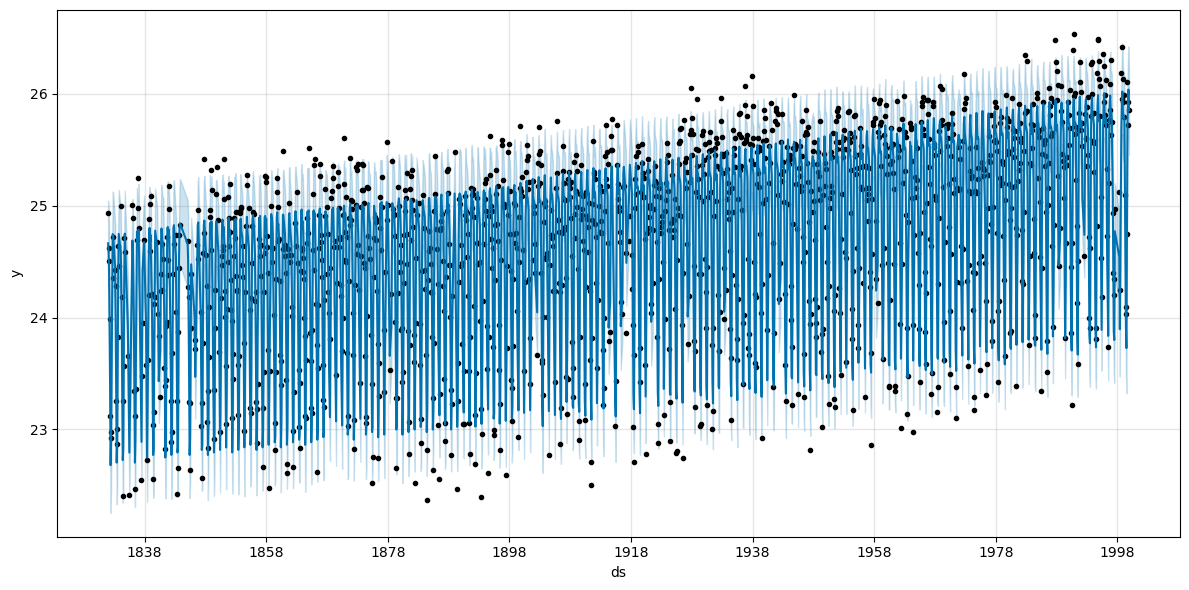

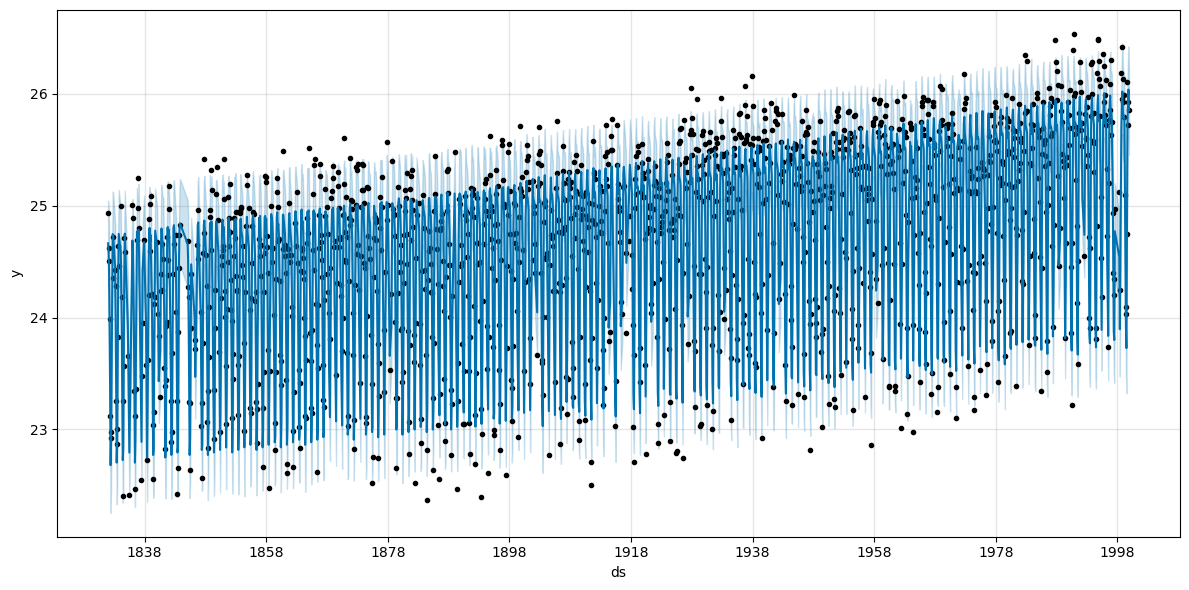

In [30]:
model_import.plot(model_import.predict(), figsize=(12, 6))